# Lab #1 
#### Aidan Berres

#### Physics 434

#### 10/11/20

---


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

## A little statistics
## Part 1
## 1. A)
This is a Gaussian Distribution, specifically the "Standard Normal" version, which is when the distribution has a mean $\mu$ of 0 and a Standard Deviation $\sigma$ of 1. We will use this to determine "sigma" probabilities later in the lab. The orange lines of the plot show the Probability Density Function (PDF) which we can integrate over to find to probabilities up to certain values of sigma.

In [2]:
d = stats.norm.rvs(loc=0,scale=1,size=100000,random_state=420)

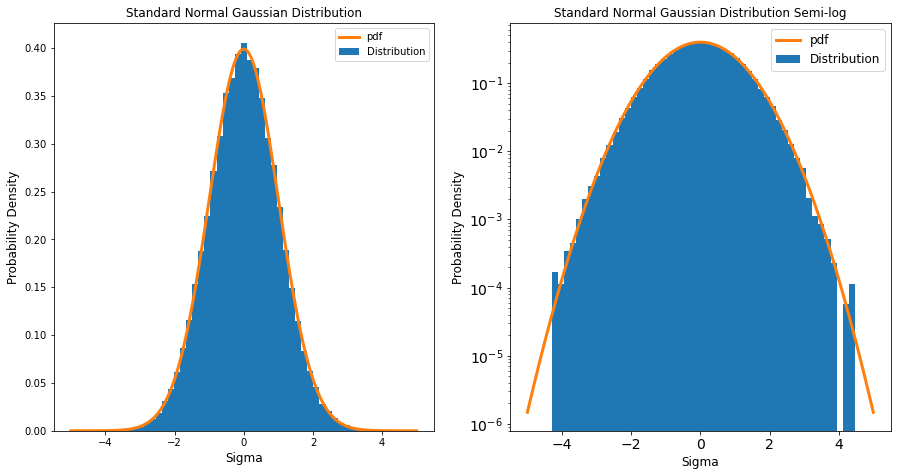

In [3]:
fig, ax = plt.subplots(1,2,figsize=(15, 7.5))
ax[0].hist(d,50, density=True,label='Distribution')
plt.tick_params(labelsize = 14)
x = np.linspace(-5,5,1000)
ax[0].plot(x,stats.norm.pdf(x,loc = 0, scale = 1),linewidth=3,label='pdf')
ax[0].set_title('Standard Normal Gaussian Distribution',fontsize=12)
ax[0].set_xlabel('Sigma',fontsize=12)
ax[0].set_ylabel('Probability Density',fontsize=12)
ax[0].legend(loc=0)
plt.yscale('log')
ax[1].hist(d,50, density=True,label='Distribution')
plt.tick_params(labelsize = 14)
x = np.linspace(-5,5,1000)
ax[1].plot(x,stats.norm.pdf(x,loc = 0, scale = 1),linewidth=3,label='pdf')
ax[1].set_title('Standard Normal Gaussian Distribution Semi-log',fontsize=12)
ax[1].set_xlabel('Sigma',fontsize=12)
ax[1].set_ylabel('Probability Density',fontsize=12)
ax[1].legend(loc=0,fontsize=12)
plt.show()

## 1. B)
Now we are integrating over the distribution above to obtain probabilities. The function that does this integration is called the Cumulative Distribution Function (CDF) which integrates the PDF as explained before. The CDF integrates from $-\infty$ to the sigma given $x'$. The CDF is represented by the integral,

$\large \displaystyle \Phi(x') = \int_{-\infty}^{x'}  \text{pdf}(x)\,dx $

$\text{Where,} \, \Phi(\infty) = 1.$

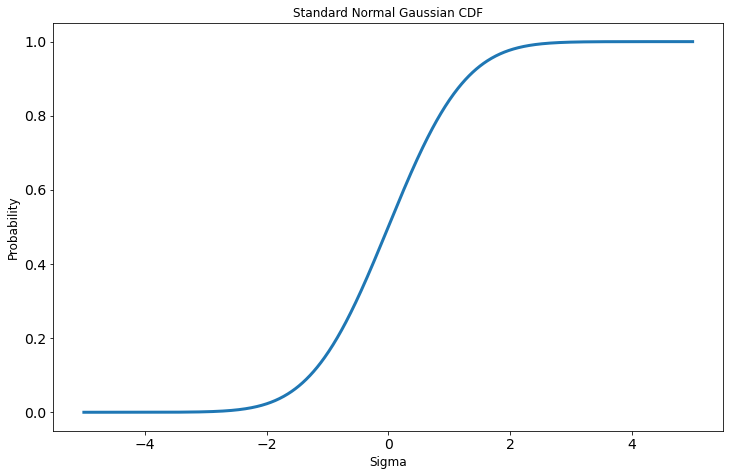

In [4]:
fig, ax = plt.subplots(figsize=(12, 7.5))
plt.tick_params(labelsize = 14)
x = np.linspace(-5,5,1000)
ax.plot(x,stats.norm.cdf(x,loc = 0, scale = 1),linewidth=3)
ax.set_title('Standard Normal Gaussian CDF',fontsize=12)
ax.set_xlabel('Sigma',fontsize=12)
ax.set_ylabel('Probability',fontsize=12)
plt.show()

Here we are giving the scipy function `stats.norm.cdf()` different values of sigma to identify if they correlate with the z-table. A z-table helps identify the "Z-score" for probability values of the CDF on a Standard Normal Distribution. The Z value is given by the function,

${\displaystyle Z={\frac {X-\mu }{\sigma }}}$

In which $X$ is the measured value, $\mu$ is the mean, and $\sigma$ is the standard deviation. Since a Standard Normal Distribution has a mean of 0 and a standard deviation of 1 we can write this equation as,

${\displaystyle Z = Z \, (1)= Z \sigma ={X}}$

Thus the Z-score for a Standard Normal Distribution is the related Sigma.

To clarify: These probabilities come from the regular CDF where it integrates the PDF from -infinity to x', this determines the probability of a measurement or less. We will see later that we can find probabilities with integrations of the PDF from x' to +infinity, this determines a probability of a measurement or greater.

In [5]:
a=[0.1,0.5,1,1.5,2.5,4]
prob=[]
for i in range(len(a)):
    p=stats.norm.cdf(a[i],loc=0,scale=1)
    print(f"Z = {a[i]}"+'\n'+f"Probability = {p}\n")
    prob.append(p)

Z = 0.1
Probability = 0.539827837277029

Z = 0.5
Probability = 0.6914624612740131

Z = 1
Probability = 0.8413447460685429

Z = 1.5
Probability = 0.9331927987311419

Z = 2.5
Probability = 0.9937903346742238

Z = 4
Probability = 0.9999683287581669



If we check [this z-table](https://en.wikipedia.org/wiki/Standard_normal_table#cite_ref-4) we find that these CDF values correlate to their Z values.

## 1. C)

In [6]:
for i in range(len(prob)):
    ar=stats.norm.ppf(prob[i],loc=0,scale=1)
    print(f"Probability = {prob[i]}"+'\n'+f"Sigma (Z) = {ar}\n")

Probability = 0.539827837277029
Sigma (Z) = 0.10000000000000002

Probability = 0.6914624612740131
Sigma (Z) = 0.5000000000000001

Probability = 0.8413447460685429
Sigma (Z) = 1.0

Probability = 0.9331927987311419
Sigma (Z) = 1.4999999999999996

Probability = 0.9937903346742238
Sigma (Z) = 2.4999999999999987

Probability = 0.9999683287581669
Sigma (Z) = 4.0



The sigma values more-or-less match the original values from 1b.

## 1. D)
If there is a minus sigma, then the probability area encompasses from infinity to a value that is less than the mean of the Standard Normal Distribution. Since a Standard Normal Distribution has a mean of zero this gives the possibility that negative sigmas can arise since half of the distribution is on the negative x-axis. This is assuming that you are finding the area on the Standard Normal Distribution from +infinity to your specified value.

---
## Part 2, $\,\chi^2\,$ Distribution

A $\chi^2$ Distribution is a sum of the squares of *k* independent random variables. It is most known for the $\chi^2$ fit which determines how well a model fits actual data points. This distribution only has 1 parameter which is the number of degrees of freedom it has (referenced in my code as either `df` or `k`). This is represented by the equation,

$ \displaystyle Q =\sum _{i=1}^{k}Z_{i}^{2}\,$ = $\,\displaystyle \sum _{i=1}^{k}\left({\frac {X_{i}-\mu _{i}}{\sigma _{i}}}\right)^{2}$

The PDF for this distribution becomes zero with any x value lower than zero since x will possibly give negative areas, become discontinuous, or have divide by zero problems.

PDF for $\,\chi^2\,$,
${\, \displaystyle f(x;\,k)={\begin{cases}{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}},&x>0;\\0,&{\text{otherwise}}.\end{cases}}}$

I wrote my own PDF function of this distribution `tc2()` to understand the distribution better. Where `x` are the x-values of the plot and `k` are the degrees of freedom.

In [7]:
gam=scipy.special.gamma
def tc2(x,k):
    try:
        num=x**((k/2)-1)*np.exp(-x/2)
        f= num/(gam(k/2)*2**(k/2))
        return f
    except:
        return 0

## 2. B)
Here are some plots of the distribution in histogram and PDF forms.

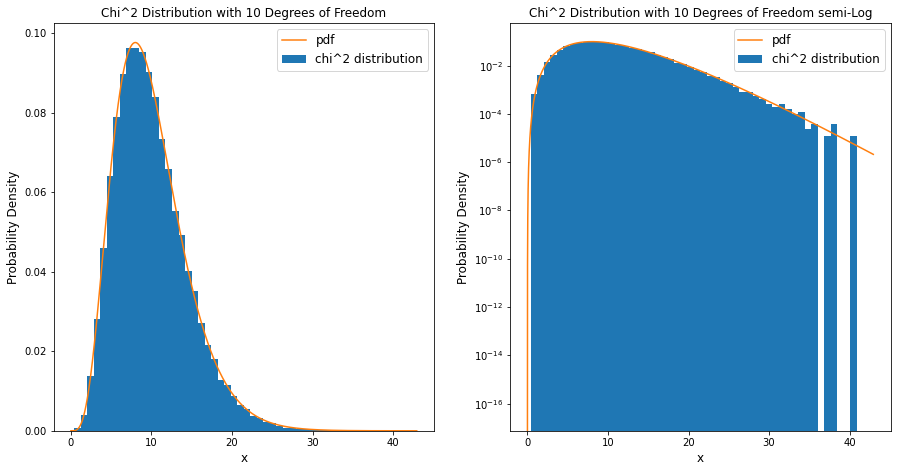

In [8]:
l=0.0
s=1.0
df=10
c21=stats.chi2.rvs(df,loc = l, scale = s, size = 100000,random_state=420)
fig, ax = plt.subplots(1,2,figsize=(15, 7.5))
ax[0].hist(c21, bins=50, density=True,label='chi^2 distribution');
v = np.linspace(0,ax[0].get_xlim()[1], 100000)
ax[0].set_title('Chi^2 Distribution with 10 Degrees of Freedom',fontsize=12)
ax[0].set_xlabel('x',fontsize=12)
ax[0].set_ylabel('Probability Density',fontsize=12)
k=10
ax[0].plot(v,tc2(v,df),label='pdf');
ax[0].legend(loc=0,fontsize=12)
plt.yscale('log')
ax[1].hist(c21, bins=50, density=True,label='chi^2 distribution');
ax[1].plot(v,tc2(v,df),label='pdf');
ax[1].set_title('Chi^2 Distribution with 10 Degrees of Freedom semi-Log',fontsize=12)
ax[1].set_xlabel('x',fontsize=12)
ax[1].set_ylabel('Probability Density',fontsize=12)
ax[1].legend(loc=0,fontsize=12);

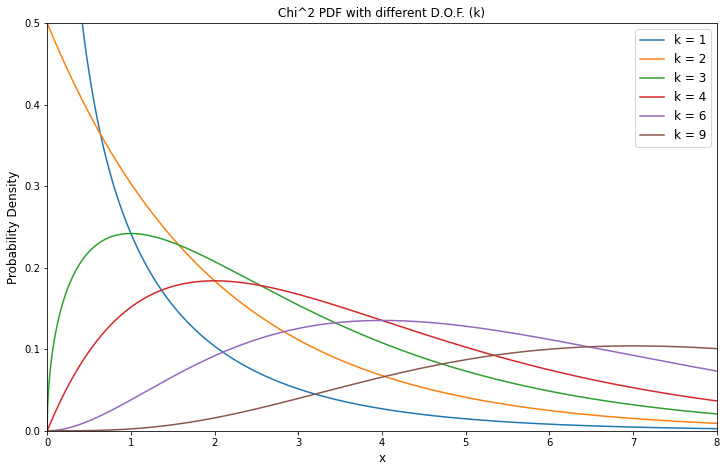

In [28]:
kd=[1,2,3,4,6,9]
fig, ax = plt.subplots(figsize=(12, 7.5))
ax.set_title('Chi^2 PDF with different D.O.F. (k)',fontsize=12)
ax.set_xlabel('x',fontsize=12)
ax.set_ylabel('Probability Density',fontsize=12)
ax.set_xlim(0,8)
ax.set_ylim(0,0.5)
v = np.linspace(0,ax.get_xlim()[1], 100000)
for i in range(len(kd)):
    ax.plot(v,stats.chi2.pdf(v,kd[i]),label=f'k = {kd[i]}')
ax.legend(loc=0,fontsize=12);

This is a recreation of the wikipedia plot shown [here](https://en.wikipedia.org/wiki/Chi-square_distribution#/media/File:Chi-square_pdf.svg).

As we can see as the degrees of freedom change we find that the PDF and the distribution gets flatter and more distributed along the x-axis. 

---
## Part 3
Now I need to find the probability of a measurement if my signal-free data follows a $\chi^2$ distribution.

Here was my train of thought while doing this part:
1. No signal data and this is **only** *signal free* data, which means my distribution is background noise.
2. I have to determine a hypothetical measurement, meaning that I am going to have to create a measurement that my background could have possibly made.
3. I have to determine what the signal "*goodness*" conditions are (is it a better signal as my values get smaller/larger or near a point). 
4. Then I can create an integral from the distribution, thus using the CDF and the Standard Normal PPF to find my sigma probabilities.


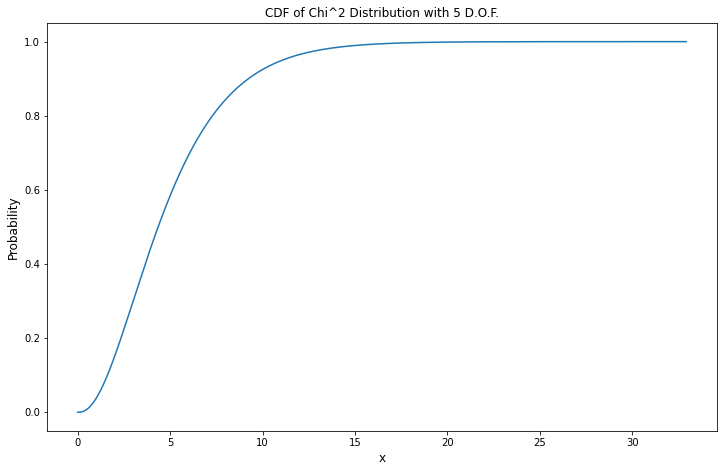

In [27]:
df=5
fig, ax = plt.subplots(figsize=(12, 7.5))
ax.plot(v,stats.chi2.cdf(v,df,loc=0,scale=1))
ax.set_xlabel('x',fontsize=12)
ax.set_title('CDF of Chi^2 Distribution with 5 D.O.F.',fontsize=12)
ax.set_ylabel('Probability',fontsize=12);

## 3. A)
Parameters of my distribution:
* `df = 5`
* `loc = 0`
* `scale = 1` 


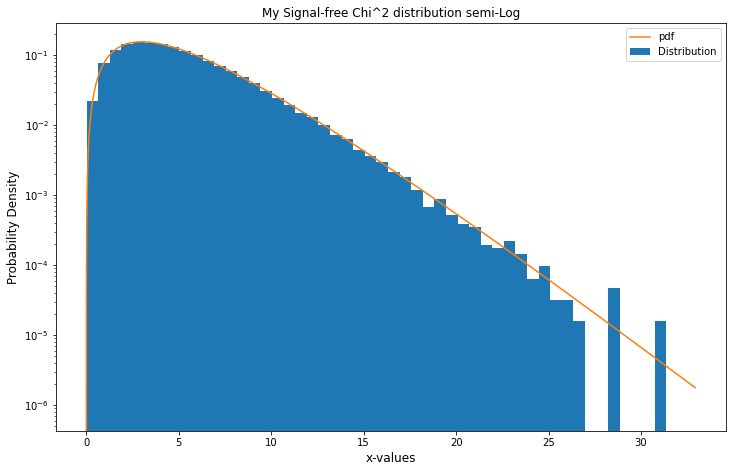

In [11]:
l=0.0
s=1.0
df=5
rs=420
ch3=stats.chi2.rvs(df=df,loc=l,scale=s,random_state=rs,size=100000)
fig, ax = plt.subplots(figsize=(12, 7.5))
ax.hist(ch3,density=True, bins=50,label='Distribution');
v = np.linspace(0,ax.get_xlim()[1], 100000)
plt.yscale('log')
ax.set_title('My Signal-free Chi^2 distribution semi-Log',fontsize=12)
ax.set_xlabel('x-values',fontsize=12)
ax.set_ylabel('Probability Density',fontsize=12)
ax.plot(v,tc2(v,df),label='pdf');
ax.legend(loc=0);

---
## 3. B)
My statistical question is, What is the probability that my signal-free data produces a signal that is equal or more signal-like to my measurement of 20?

## 3. C)
The CDF of this function is this integral, which `scipy.stats` uses to find probabilities,

${\displaystyle \int_{-\infty}^{x'}{{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}}}\,dx}$ 

but since the function only has positive x-values (see latex function below) and since it is "as or more signal-like" we must integrate from our measurement x' to +infinity,

${\displaystyle f(x;\,k)={\begin{cases}{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}},&x>0;\\0,&{\text{otherwise}}.\end{cases}}}$ 

we can possibly write,

$\large 1\,-\,{\displaystyle \int_{0}^{x'}{{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}}}\,dx} = {\displaystyle \int_{x'}^{+\infty}{{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}}}\,dx}$

Thus we have the integral going from x' to positive infinity since we subtracted the total area of 1 from the integral.

## 3. D)
This is the process of finding the probability that at my measured value the background can produce a signal that is as or more signal like.

Taking the integral from 0 to my value and subtracting by the total area gives my probability,

In [12]:
cdef=stats.chi2.cdf(20,df=df,loc=l,scale=s)
print(f'Probability from CDF = {1-cdef}')
print(f"\nThe probability that my signal-free data produces a signal that is equal or more signal-like is around {(1-cdef)*100:0.2f}%\n")

Probability from CDF = 0.0012497305630313482

The probability that my signal-free data produces a signal that is equal or more signal-like is around 0.12%



We can check if we did the integration correctly with `stats.chi2.ppf()`

In [13]:
stats.chi2.ppf(cdef,df,loc=l,scale=s)

20.00000000000005

## 3. E)

The z-scale value for 0.001249 is around 3.02 from [this z-table](https://en.wikipedia.org/wiki/Standard_normal_table#cite_ref-5), we can check that by using `stats.norm.ppf()`. Also, since we are integrating from +infinity to our sigma on the standard normal distribution (essentially backwards integration) we can give it the full area from the CDF of the signal-free distribution (integrating from -infinity to x) and it will give the same location if we were to integrate the signal-free distribution from our value to +infinity (1 - CDF) and integrate from +infinity to our sigma on the standard normal distribution (ppf(1 - CDF)). 

In [14]:
stats.norm.ppf(cdef)

3.0234066693206474

Thus the probability that my signal-free data produces a signal that is equal or more signal-like is about 3.02 $\sigma$

---
## Part 4
Creating my own Sigma finder `sigFind()` where `mv` is my measured value.

In [15]:
def sigFind(mv):
    cdef=stats.chi2.cdf(mv,df=5,loc=0,scale=1)
    zsig=stats.norm.ppf(cdef)
    return zsig

In [16]:
mes=[4,6,13,21,25]
for i in range(len(mes)):
    print(f"A measurement of {mes[i]} gives a probability of {sigFind(mes[i]):0.2f} sigma\n")

A measurement of 4 gives a probability of -0.12 sigma

A measurement of 6 gives a probability of 0.51 sigma

A measurement of 13 gives a probability of 1.99 sigma

A measurement of 21 gives a probability of 3.15 sigma

A measurement of 25 gives a probability of 3.63 sigma



I can see that as the measurement number increases that the sigma also increases. Furthermore, my measurement of 4 gives a negative sigma since it has a very large area (past the mean) from positive infinity to sigma on a Standard Normal Distribution. There doesn't seem to be any proportionality to the measured value and the corresponding probability.

---
## Non-continuous distributions
## Binomial Distribution

A Binomial Distribution shows the probabilities of "good" results out of a certain number of independent tests `n`, which give either "yes" or "no". These tests are given a probability that a "yes" will occur `p`, this value is between 0 and 1. For example,
* If n = 5 and p = 0.5, this means that there are 5 independent tests in the set and each test has a 50% chance of giving a "yes" or "no"
What the histogram plots is how many tests give "yes" out of the total amount of tests. For example, if I had 3 out of 5 tests say yes, then the bin at x=3 will get a point. After multiple rounds of testing, we find a distribution of points.

For probabilities we can say that the bin with the most points is the most probable outcome of a round of testing the set. For example,

* "It is most probable that half the tests will give yes"

## Part B

For this state:
* n=10, p=0.5
* It is doing 100k sets of 10 individual tests

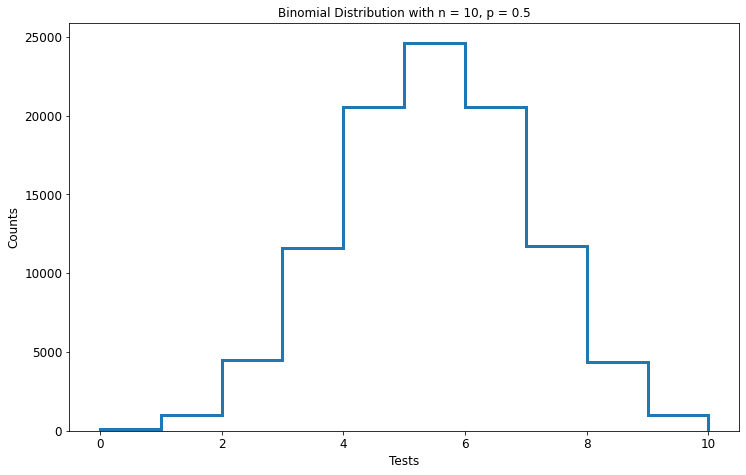

In [24]:
bi=stats.binom.rvs(n=10,p=0.5,size=100000,random_state=420)
fig, ax = plt.subplots(figsize=(12, 7.5))
ax.hist(bi,histtype='step',linewidth=3)
ax.tick_params(labelsize = 12)
ax.set_xlabel('Tests',fontsize=12)
ax.set_ylabel('Counts',fontsize=12)
ax.set_title('Binomial Distribution with n = 10, p = 0.5',fontsize=12);

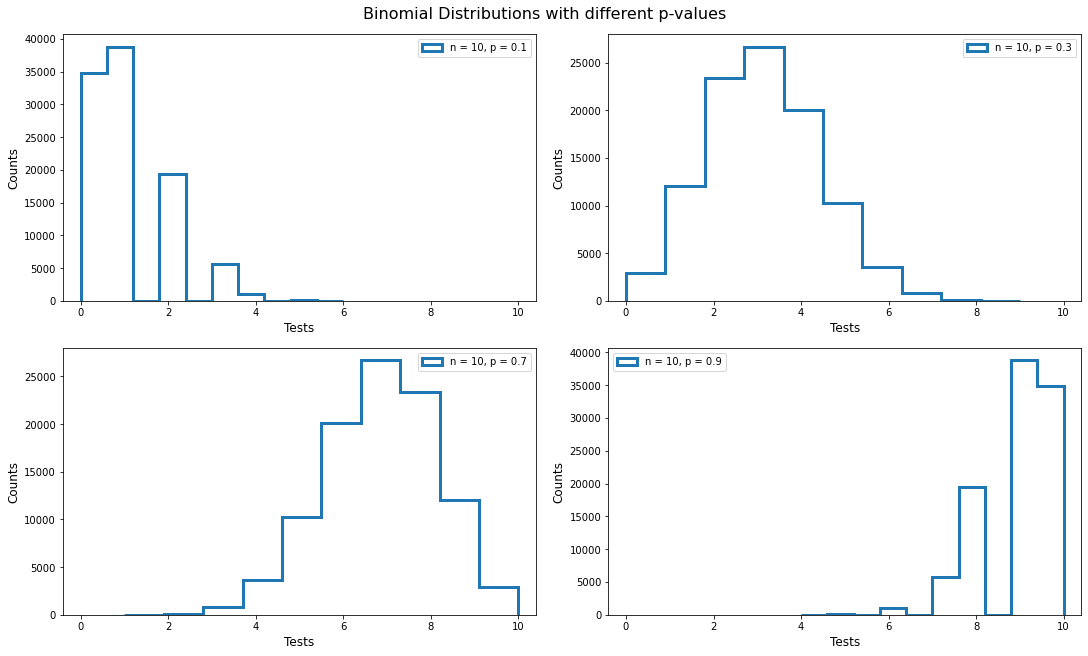

In [26]:
fig, ax = plt.subplots(2,2,figsize=(15, 9),constrained_layout=True)
pr = [0.1,0.3,0.7,0.9]
ax = ax.flatten()
fig.suptitle('Binomial Distributions with different p-values',fontsize=16)
for i in range(len(pr)):
    bi1=stats.binom.rvs(n=10,p=pr[i],size=100000,random_state=420)
    ax[i].set_xlim(-0.4,10.4)
    ax[i].hist(bi1,histtype='step',linewidth=3,label=f"n = 10, p = {pr[i]}")
    ax[i].set_xlabel('Tests',fontsize=12)
    ax[i].set_ylabel('Counts',fontsize=12)
    ax[i].legend(loc=0);

As stated before the histograms of Binomial Distributions add up the outcomes of a set of independent tests. The x-axis defines the x/n (x out of n) tests and the y-axis defines the outcome of the set. We can see that as we vary the success rate of each independent binary test the histograms reflect the successes. When the success rate is low, we expect the most probable outcome would be the lowest amount of tests giving yes. As the success rate increases we find the most probable outcome to be the largest amount of tests giving yes.

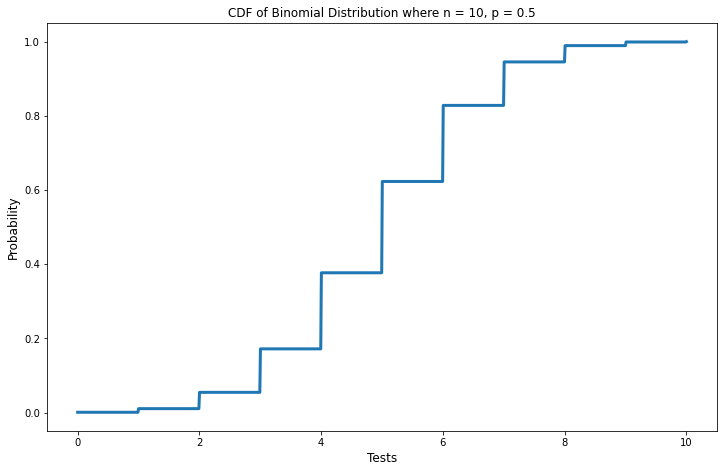

In [19]:
fig, ax = plt.subplots(figsize=(12, 7.5))
x = np.linspace(0,10,1000)
ax.plot(x,stats.binom.cdf(x,10,0.5),linewidth=3)
ax.set_title('CDF of Binomial Distribution where n = 10, p = 0.5',fontsize=12)
ax.set_xlabel('Tests',fontsize=12)
ax.set_ylabel('Probability',fontsize=12);

## Part C

My hypothetical question is, What is the probability that 3 (and lower) out of n tests will give "yes" with n = 10 tests in each round and a 50% "yes" (success) rate?

In [20]:
cd2=stats.binom.cdf(3,n=10,p=0.5)
print(f'The probability from the CDF = {cd2}')
print(f'\nThe probability that 3 (and lower) out of n tests will give "yes" is {cd2*100:0.2f}%\n')

The probability from the CDF = 0.17187499999999994

The probability that 3 (and lower) out of n tests will give "yes" is 17.19%



Note: Since we are saying the probability is "3 and lower" we can use the original CDF integral that integrates from -infinity to x'.

## Part D
The implications for experiments means that any sets of tests run have to be descrete and the results of the tests must be of binary form eg "yes" or "no". Also these tests cannot change the success rate and they cannot influence each other. Tests must be independent of each other and have the same success rate, which can be difficult to standardize in the real world.

## Part E
In terms of the mean value, it can make sense for it to be non-discrete since division is a continuous process. For example, my distribution added up has 499428 counts to it, once you divide that by the discrete amount of points, which was 100K, we find that the average is 4.99428, which is not discrete. The counts *change* continuously since the success probability `p` is a discrete number. However, the individual tests `n` and the actual results for each test are discrete.

In [25]:
np.mean(bi)

4.99428